# Modeling

## Import Libraries and Load Data

In [35]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
df = pd.read_csv('data/housing_aspects.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,1690,7639
1,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,2720,8062
2,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,1360,5000
3,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,1800,7503
4,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,0.0,2238,6819


In [36]:
df = df.round()
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,17547.000000,17547.000000,17547.000000,17547.000000,1.754700e+04,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000
mean,460189.341768,3.295378,1.957486,1920.989400,1.414237e+04,1.506639,0.002508,0.151194,3.405596,7.474839,1666.420414,249.077791,1970.634980,57.993218,1888.354875,12193.753690
std,188823.087497,0.847484,0.639351,709.673746,3.799311e+04,0.554968,0.050014,0.598541,0.644858,0.985118,680.830924,388.759009,29.066785,335.209528,573.508536,25501.472704
min,78000.000000,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,310000.000000,3.000000,2.000000,1380.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1160.000000,0.000000,1951.000000,0.000000,1460.000000,5025.500000
50%,430000.000000,3.000000,2.000000,1830.000000,7.482000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1490.000000,0.000000,1974.000000,0.000000,1780.000000,7503.000000
75%,580092.500000,4.000000,2.000000,2380.000000,1.018250e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2040.000000,480.000000,1996.000000,0.000000,2240.000000,9780.000000
max,974350.000000,6.000000,4.000000,4280.000000,1.651359e+06,4.000000,1.000000,4.000000,5.000000,11.000000,4270.000000,2150.000000,2015.000000,2015.000000,3900.000000,560617.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17547 entries, 0 to 17546
Data columns (total 16 columns):
price            17547 non-null float64
bedrooms         17547 non-null int64
bathrooms        17547 non-null float64
sqft_living      17547 non-null int64
sqft_lot         17547 non-null int64
floors           17547 non-null float64
waterfront       17547 non-null float64
view             17547 non-null float64
condition        17547 non-null int64
grade            17547 non-null int64
sqft_above       17547 non-null int64
sqft_basement    17547 non-null float64
yr_built         17547 non-null int64
yr_renovated     17547 non-null float64
sqft_living15    17547 non-null int64
sqft_lot15       17547 non-null int64
dtypes: float64(7), int64(9)
memory usage: 2.1 MB


## Linear Regression

In [38]:
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

### Baseline

In [39]:
baseline = ols(formula="price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + sqft_living15 + sqft_lot15", data=df).fit()
baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     1385.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:19:13   Log-Likelihood:            -2.3121e+05
No. Observations:               17547   AIC:                         4.625e+05
Df Residuals:                   17531   BIC:                         4.626e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.942e+06   8.68e+04     45.419      0.000    3.77e+06    4.11e+06
bedrooms      -1.758e+04   1482.094    -11.863      0.000   -2.05e+04   -1.47e+04
bathrooms      2.369e+04   2070.650     11.441      0.000    1.96e+04    2.77e+04
sqft_living      83.4437     14.054      5.937      0.000      55.897     110.990
sqft_lot          0.1541      0.036      4.287      0.000       0.084       0.225
floors         4.927e+04   2214.262     22.250      0.000    4.49e+04    5.36e+04
waterfront     7.692e+04   2.02e+04      3.799      0.000    3.72e+04    1.17e+05
view            1.78e+04   1755.063     10.144      0.000    1.44e+04    2.12e+04
condition      1.616e+04   1640.106      9.853      0.000    1.29e+04    1.94e+04
grade          8.661e+04   1554.625     55.710      0.000    8.36e+04    8.97e+04
sqft_above      -27.2148     13.990     -1.945      0.052     -54.637       0.208
sqft_basement     4.5944     13.934      0.330      0.742     -22.719      31.907
yr_built      -2268.9068     44.876    -50.560      0.000   -2356.868   -2180.946
yr_renovated      7.7025      2.997      2.570      0.010       1.828      13.577
sqft_living15    56.1845      2.700     20.807      0.000      50.892      61.477
sqft_lot15       -0.2601      0.054     -4.820      0.000      -0.366      -0.154
==============================================================================
Omnibus:                      322.560   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.831
Skew:                           0.295   Prob(JB):                     9.89e-80
Kurtosis:                       3.386   Cond. No.                     4.20e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\daveb\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


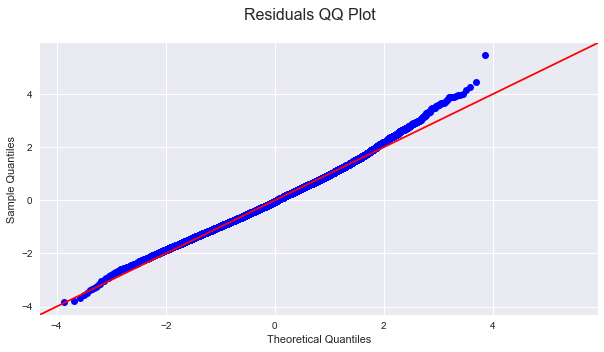

In [40]:
residuals = baseline.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16)
fig.set_size_inches(10, 5)
fig.show()

In [41]:
# R Squared is at only .584, meaning it covers 58.4% of the model
# some P values are over 5%, meaning there could be multicolinearity

### Model 1

In [42]:
# run an OLS model excluding everything with a P value of over 5%

In [43]:
# model with only normally distributed log transformations
model1 = ols(formula="price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + yr_built + yr_renovated + sqft_living15 + sqft_lot15", data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     1582.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:19:15   Log-Likelihood:            -2.3126e+05
No. Observations:               17547   AIC:                         4.625e+05
Df Residuals:                   17533   BIC:                         4.627e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.078e+06   8.59e+04     47.496      0.000    3.91e+06    4.25e+06
bedrooms      -1.747e+04   1485.788    -11.756      0.000   -2.04e+04   -1.46e+04
bathrooms      2.751e+04   2038.319     13.496      0.000    2.35e+04    3.15e+04
sqft_living      67.8393      2.703     25.096      0.000      62.541      73.138
sqft_lot          0.1366      0.036      3.796      0.000       0.066       0.207
floors         4.016e+04   2011.093     19.969      0.000    3.62e+04    4.41e+04
waterfront     7.391e+04   2.03e+04      3.641      0.000    3.41e+04    1.14e+05
view           2.006e+04   1744.018     11.501      0.000    1.66e+04    2.35e+04
condition       1.69e+04   1642.251     10.288      0.000    1.37e+04    2.01e+04
grade          8.533e+04   1553.139     54.943      0.000    8.23e+04    8.84e+04
yr_built      -2333.3631     44.499    -52.436      0.000   -2420.586   -2246.140
yr_renovated      6.7784      3.003      2.257      0.024       0.892      12.665
sqft_living15    50.5436      2.644     19.117      0.000      45.361      55.726
sqft_lot15       -0.2765      0.054     -5.115      0.000      -0.383      -0.171
==============================================================================
Omnibus:                      306.585   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              341.049
Skew:                           0.291   Prob(JB):                     8.75e-75
Kurtosis:                       3.356   Cond. No.                     4.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\daveb\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


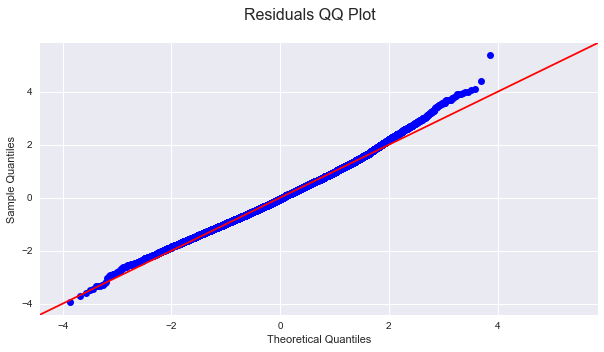

In [44]:
residuals = model1.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16)
fig.set_size_inches(10, 5)
fig.show()

In [45]:
# we see that the R Squared acutally dropped by .001
# let's look further into multicolinearity among all columns


## Check for Multicolinearity

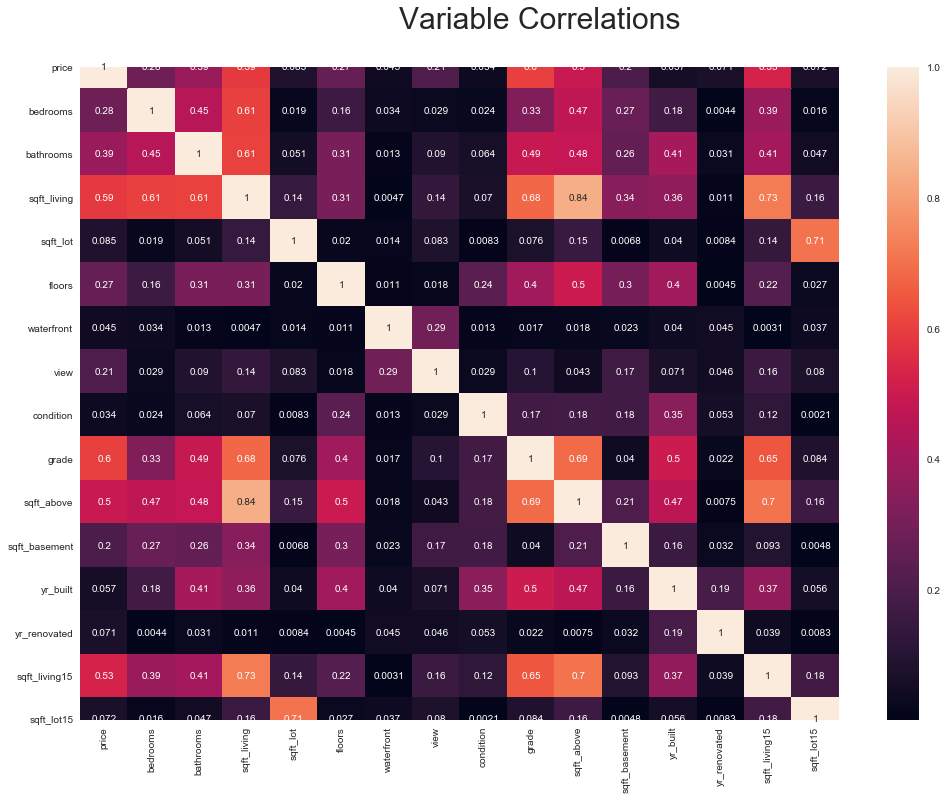

In [46]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95)
heatmap = sns.heatmap(corr, annot=True)
heatmap

In [47]:
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [48]:
# usually any variables that correlate more than 80%
multicollinear_features = []
multicollinear_corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .80 and idx != feature:
            multicollinear_features.append([feature, idx])
            multicollinear_corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':multicollinear_corr, 'Features': multicollinear_features})
print('Multicollinear Features')
display(MC_df)
print('Correlations with Price')
display(corr_price_df)

Multicollinear Features


,Correlations,Features
0,0.842243,"[sqft_living, sqft_above]"
1,0.842243,"[sqft_above, sqft_living]"


Correlations with Price


,Correlations,Features
2,0.600891,grade
1,0.588592,sqft_living
4,0.528374,sqft_living15
3,0.495815,sqft_above
0,0.385507,bathrooms


In [49]:
# either sqft_living or sqft_above has to be dropped to elminate any multicolinearity
# the heatmap and correlations with price chart give us a good idea of what columns work best with price
# check for linearity in columns that have the most correlations with price
price = df['price']
bath = df['bathrooms']
bed = df['bedrooms']
grade = df['grade']
sqft_living15 = df['sqft_living15']
floors = df['floors']
view = df['view']
sqft_living = df['sqft_living']
sqft_above = df['sqft_above']

C:\Users\daveb\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 576x396 with 0 Axes>

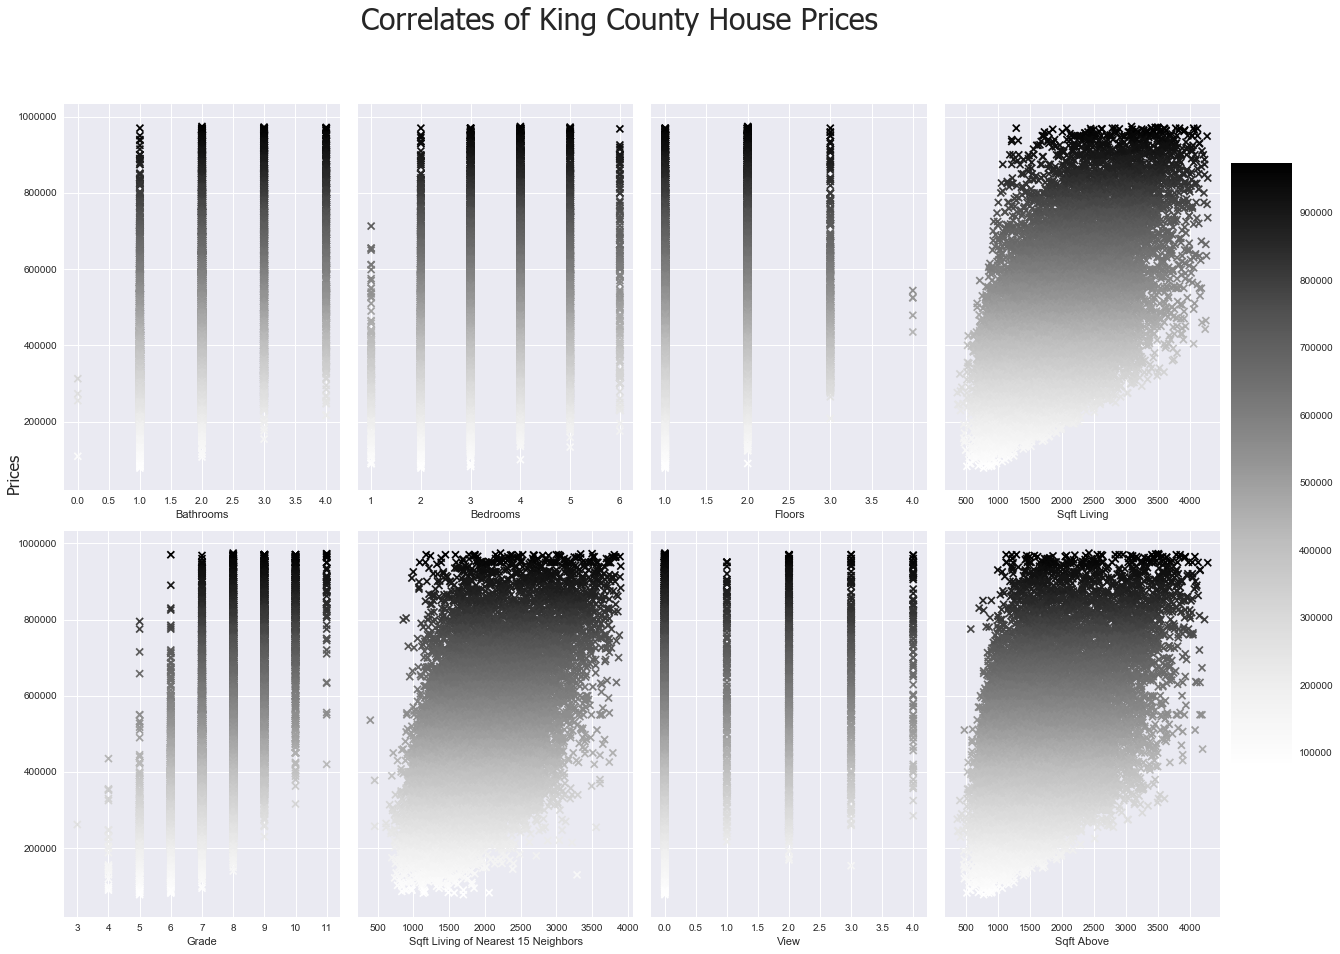

In [50]:
f = plt.figure()
f, axes = plt.subplots(nrows = 2, ncols = 4, sharex=False, sharey = True, figsize=(17,12))

f.suptitle('Correlates of King County House Prices', fontsize=30, y=1.1, fontname='Tahoma')
f.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16, fontname='Tahoma')

sc = axes[0][0].scatter(bath, price, c = price, marker = "x")
axes[0][0].set_xlabel('Bathrooms')

axes[0][1].scatter(bed, price, c = price, marker = "x")
axes[0][1].set_xlabel('Bedrooms')

axes[1][0].scatter(grade, price, c = price, marker = "x")
axes[1][0].set_xlabel('Grade')

axes[1][1].scatter(sqft_living15, price, c = price, marker = "x")
axes[1][1].set_xlabel('Sqft Living of Nearest 15 Neighbors')

axes[0][2].scatter(floors, price, c = price, marker = "x")
axes[0][2].set_xlabel('Floors')

axes[1][2].scatter(view, price, c = price, marker = "x")
axes[1][2].set_xlabel('View')

sc = axes[0][3].scatter(sqft_living, price, c = price, marker = "x")
axes[0][3].set_xlabel('Sqft Living')

sc = axes[1][3].scatter(sqft_above, price, c = price, marker = "x")
axes[1][3].set_xlabel('Sqft Above')


cbar_ax = f.add_axes([1, 0.22, 0.05, 0.7])
f.colorbar(sc, cbar_ax)

f.tight_layout()
plt.show()

In [51]:
# bedrooms, floors and view are not linear
# sqft_living is more linear than sqft_above so it will be the column included

### Model 2

In [52]:
model2 = ols(formula="price ~ bathrooms + grade + sqft_living + sqft_living15", data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     3243.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:19:27   Log-Likelihood:            -2.3321e+05
No. Observations:               17547   AIC:                         4.664e+05
Df Residuals:                   17542   BIC:                         4.665e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.395e+05   9093.102    -26.339      0.000   -2.57e+05   -2.22e+05
bathrooms      2066.1780   2161.898      0.956      0.339   -2171.357    6303.713
grade          6.562e+04   1595.710     41.120      0.000    6.25e+04    6.87e+04
sqft_living      73.0923      2.676     27.313      0.000      67.847      78.338
sqft_living15    34.3037      2.895     11.850      0.000      28.630      39.978
==============================================================================
Omnibus:                      639.229   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.690
Skew:                           0.491   Prob(JB):                    4.74e-155
Kurtosis:                       3.077   Cond. No.                     2.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\daveb\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


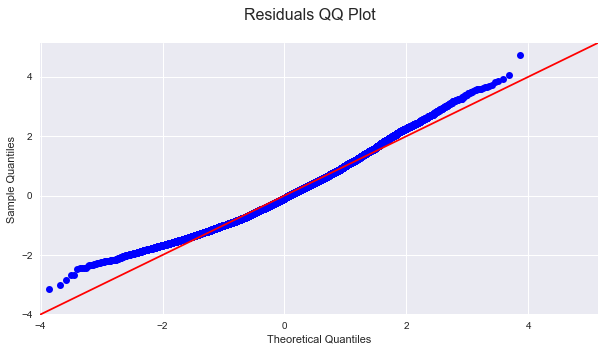

In [53]:
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16)
fig.set_size_inches(10, 5)
fig.show()

In [54]:
# when dropping additional values with lower correlations, the R Squared value dropped to 44.9%

## Checking Variable Distributions

In [55]:
from statsmodels.formula.api import ols

In [56]:
x_cols = ['bathrooms', 'grade', 'sqft_living', 'sqft_living15']

In [ ]:
non_normal = ['bathrooms', 'grade', 'sqft_living', 'sqft_living15']
for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.log(x))
sns.pairplot(df[x_cols]);

In [ ]:
outcome = 'price'
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
variation = ols(formula=formula, data=df).fit()
variation.summary()

In [ ]:
residuals = variation.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16)
fig.set_size_inches(10, 5)
fig.show()

## Homoscedasticity

In [28]:
plt.figure(figsize=(10,5))
sns.regplot(x=variation.predict(), y=variation.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99)

NameError: name 'variation' is not defined

<Figure size 720x360 with 0 Axes>

## Model Validation

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['price', 'bedrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)